# Linear Algebra / Matrix Algebra and Numpy 


#### Why do we need **matrix algebra** and not just **regular algebra**?

#### 1. **Compact Representation of Multiple Equations**

In ML, you often deal with **many variables and many data points**. For example:

* You may have a dataset with 10,000 rows and 100 features.
* Writing 10,000 equations in regular algebra would be insane.

 **Matrix algebra compresses** all these equations into a single expression like:

$$
\mathbf{y} = \mathbf{Xw}
$$

Where:

* $\mathbf{X}$ is a **matrix** of data,
* $\mathbf{w}$ is a **vector** of weights,
* $\mathbf{y}$ is a **vector** of outputs.

#### 2. **Vectorization = Speed**

Normal algebra operates on scalars. But machine learning runs on large datasets. So you want to:

* Apply the same operation across many values **at once**.
* Matrices and vectors allow for **batch operations** using optimized libraries (like NumPy, TensorFlow, PyTorch, etc.).

Matrix algebra helps you write **fast, parallel computations** that are hardware-accelerated.


#### 3. **Elegant Math for Linear Systems**

Machine learning algorithms (like linear regression, PCA, neural networks, etc.) often boil down to solving **systems of equations** or **optimization problems**. These naturally form matrix equations.

Example: Linear regression closed-form solution: (don't get intimidated, it is a simple equation once we study it in depth)

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This can't be easily or clearly expressed without matrix notation.


#### 4. **Geometric Interpretability**

Matrix operations like dot products, projections, and rotations have **geometric interpretations** that are powerful in understanding models:

* Dot product = projection = similarity.
* Matrix multiplication = linear transformation (rotate, scale, shear).
* Eigenvectors = directions of variance (used in PCA).

These interpretations become clearer **only through matrix math**.


#### 5. **Neural Networks & Deep Learning**

In deep learning:

* Each layer is a matrix transformation followed by a non-linearity.
* Forward and backward passes rely on **matrix derivatives** (Jacobian, gradients, etc.).

Without matrix algebra, expressing and computing this becomes nearly impossible.


| Benefit                    | Matrix Algebra Provides           |
| -------------------------- | --------------------------------- |
| Handles multiple variables | **Compact notation**                |
| Speed of computation       | **Vectorized operations**           |
| Solving ML problems        | **Linear system solvers**           |
| Geometric insights         | **Dot products, projections, etc.** |
| Neural nets & gradients    | **Chain rule with matrices**        |


In [22]:
import numpy as np
import matplotlib.pyplot as plt

#### Matrix Creation
Create a 2x3 matrix

In [23]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
print("Matrix A:\n", A)
type(A)

Matrix A:
 [[1 2 3]
 [4 5 6]]


numpy.ndarray

In [24]:
type([1,2,3])

list

#### **Zero Matrix $0$**

* All elements are zero.
* $A + 0 = A$
* $A \cdot 0 = 0$


In [25]:
np.zeros((10,10)) 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Matrix Shape and Reshaping

Check shape

In [26]:
print("Shape of A:", A.shape)

# Reshape A to a 3x2 matrix
A_reshaped = A.reshape(3, 2)
print("Reshaped A:\n", A_reshaped)

Shape of A: (2, 3)
Reshaped A:
 [[1 2]
 [3 4]
 [5 6]]


#### **Matrix Addition**
You can add two matrices **only if they have the same dimensions**.

$$
A + B = C \quad \text{(if } A, B \in \mathbb{R}^{m \times n} \text{)}
$$

Each element is added component-wise:

$$
C_{ij} = A_{ij} + B_{ij}
$$

#### Properties:

| Property              | Meaning                                                   |
| --------------------- | --------------------------------------------------------- |
| **Commutative**       | $A + B = B + A$                                           |
| **Associative**       | $(A + B) + C = A + (B + C)$                               |
| **Additive Identity** | There exists a **zero matrix** $0$ such that $A + 0 = A$  |
| **Additive Inverse**  | For every $A$, there exists $-A$ such that $A + (-A) = 0$ |

In [6]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8, 9],
              [10, 11, 12]])

# Element-wise addition
C = A + B
print("A + B =\n", C)

# Element-wise subtraction
D = A - B
print("A - B =\n", D)

A + B =
 [[ 8 10 12]
 [14 16 18]]
A - B =
 [[-6 -6 -6]
 [-6 -6 -6]]


#### Scalar Multiplication

 **Scalar Multiplication**

Multiplying a matrix by a scalar means multiplying **each element** by the scalar.

$$
\alpha A = B \quad \text{(where } B_{ij} = \alpha \cdot A_{ij} \text{)}
$$

#### Properties:

| Property                              | Meaning                                  |
| ------------------------------------- | ---------------------------------------- |
| **Distributive over addition**        | $\alpha(A + B) = \alpha A + \alpha B$    |
| **Distributive over scalar addition** | $(\alpha + \beta)A = \alpha A + \beta A$ |
| **Associative with scalars**          | $(\alpha \beta) A = \alpha (\beta A)$    |
| **Multiplicative Identity**           | $1 \cdot A = A$                          |

In [7]:
E = 2 * A
print("2 * A =\n", E)

2 * A =
 [[ 2  4  6]
 [ 8 10 12]]


#### **Matrix Multiplication**

You can multiply matrices if the **number of columns in the first** equals the **number of rows in the second**.

If $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{n \times p}$, then:

$$
C = AB \quad \text{where } C \in \mathbb{R}^{m \times p}
$$

$$
C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj}
$$

#### Properties:

| Property                    | Meaning                                                     |
| --------------------------- | ----------------------------------------------------------- |
| **Associative**             | $(AB)C = A(BC)$                                             |
| **Distributive**            | $A(B + C) = AB + AC$                                        |
| **Not Commutative**         | $AB \ne BA$ in general                                    |
| **Multiplicative Identity** | $AI = IA = A$, where $I$ is the **identity matrix**         |
| **Zero Product Possible**   | It’s possible that $AB = 0$ even if $A \ne 0$ and $B \ne 0$ |


In [8]:
a_ = np.array([1, 2, 3])
b_ = np.array([4, 5, 6])
np.dot(a_, b_)  # 1*4 + 2*5 + 3*6 = 32


np.int64(32)

In [9]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

F = np.array([[1, 2],
              [3, 4],
              [5, 6],
             ])

G = np.matmul(A, F)
print(A.shape, F.shape)
print("A X F =\n", G)

(2, 3) (3, 2)
A X F =
 [[22 28]
 [49 64]]


#### Element-wise Multiplication

In [10]:
H = A * B
print("Element-wise multiplication A * B =\n", H)

Element-wise multiplication A * B =
 [[ 7 16 27]
 [40 55 72]]


#### Transpose of a Matrix

Flipping rows into columns.

$$
(A^T)_{ij} = A_{ji}
$$

#### Properties:

| Property                    | Meaning                             |
| --------------------------- | ----------------------------------- |
| $(A^T)^T = A$               | Transposing twice gets the original |
| $(A + B)^T = A^T + B^T$     | Transpose is linear                 |
| $(\alpha A)^T = \alpha A^T$ | Scalar pull-out                     |
| $(AB)^T = B^T A^T$          | Note the **order reversal**         |

In [11]:
print(A)
print("---")
print(A.T)
A_T = A.T
print("Transpose of A:\n", A_T)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]
Transpose of A:
 [[1 4]
 [2 5]
 [3 6]]



#### **Identity Matrix $I$**

The identity matrix acts like 1 does in arithmetic.

* $I \in \mathbb{R}^{n \times n}$
* Diagonal entries = 1, rest = 0

$$
AI = IA = A
$$

#### Example: 3×3 Identity Matrix

$$
I_3 = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$


In [12]:
id_ = np.eye(8,8)
print(id_)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### Inverse of a Matrix
#### **Inverse (only for square matrices)**

If a matrix $A \in \mathbb{R}^{n \times n}$ is invertible, there exists $A^{-1}$ such that:

$$
AA^{-1} = A^{-1}A = I
$$

Not all matrices are invertible.


In [13]:
M = np.array([[4, 7],
              [2, 6]])


M_inv = np.linalg.inv(M)
print("M: ", M)
print("Inverse of M:\n", M_inv)

# Verify: M * M_inv should be identity
np.matmul(M, M_inv) == np.eye(2,2)

M:  [[4 7]
 [2 6]]
Inverse of M:
 [[ 0.6 -0.7]
 [-0.2  0.4]]


array([[False, False],
       [False,  True]])

#### Identity Matrix

In [14]:
# Create 3x3 identity matrix
I = np.eye(3)
print("Identity matrix:\n", I)


Identity matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


####  What is **Adjoint or Adjugate** of a Matrix?

The **adjoint (or adjugate)** of a square matrix $A$ is the **transpose of its cofactor matrix**.

$$
\text{adj}(A) = \text{Cofactor}(A)^T
$$


####  Step 1: **Minor of an element $A_{ij}$**

* The **minor** of an element $A_{ij}$ is the **determinant** of the submatrix you get by **removing row $i$** and **column $j$**.

 

####  Step 2: **Cofactor of an element $A_{ij}$**

* The **cofactor** is:

$$
\text{Cofactor}_{ij} = (-1)^{i+j} \cdot \text{Minor}_{ij}
$$

That sign alternates like a checkerboard:

$$
\begin{bmatrix}
+ & - & + \\
- & + & - \\
+ & - & +
\end{bmatrix}
$$

 

####  Step 3: **Build the Cofactor Matrix**

Construct a matrix where each element is replaced by its **cofactor**.
 

#### Step 4: **Transpose the Cofactor Matrix**

This gives you the **adjugate matrix**.

 

####  Example: Adjugate of a 2×2 Matrix

Let:

$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

Then the **adjugate of A** is:

$$
\text{adj}(A) = \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

This is exactly what we use in the inverse formula:

$$
A^{-1} = \frac{1}{ad - bc} \cdot \text{adj}(A)
$$


In [15]:
# Determinant of M
det_M = np.linalg.det(M)
print("Determinant of M:", det_M)


Determinant of M: 10.000000000000002


#### Matrix R:

Let’s take a simple matrix:

$$
R = \begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
5 & 6 & 0
\end{bmatrix}
$$


#### Step 1: Compute **Determinant of R** (denoted as |R|)

Use cofactor expansion along row 1:

$$
|R| = 1 \cdot \begin{vmatrix} 1 & 4 \\ 6 & 0 \end{vmatrix}
     - 2 \cdot \begin{vmatrix} 0 & 4 \\ 5 & 0 \end{vmatrix}
     + 3 \cdot \begin{vmatrix} 0 & 1 \\ 5 & 6 \end{vmatrix}
$$

Compute each 2×2 determinant:

* $\begin{vmatrix} 1 & 4 \\ 6 & 0 \end{vmatrix} = (1)(0) - (4)(6) = -24$
* $\begin{vmatrix} 0 & 4 \\ 5 & 0 \end{vmatrix} = (0)(0) - (4)(5) = -20$
* $\begin{vmatrix} 0 & 1 \\ 5 & 6 \end{vmatrix} = (0)(6) - (1)(5) = -5$

Now plug back:

$$
|R| = 1(-24) - 2(-20) + 3(-5) = -24 + 40 - 15 = \boxed{1}
$$

So the determinant is 1, which means **R is invertible**, and:

$$
R^{-1} = \text{adj}(R)
$$

(Since $\frac{1}{|R|} = 1$)


#### Step 2: Compute the **Cofactor Matrix**

We now compute each cofactor $C_{ij} = (-1)^{i+j} \cdot M_{ij}$, where $M_{ij}$ is the minor of element $R_{ij}$.

##### First row cofactors:

* $C_{11} = (+1) \cdot \begin{vmatrix} 1 & 4 \\ 6 & 0 \end{vmatrix} = -24$
* $C_{12} = (-1) \cdot \begin{vmatrix} 0 & 4 \\ 5 & 0 \end{vmatrix} = +20$
* $C_{13} = (+1) \cdot \begin{vmatrix} 0 & 1 \\ 5 & 6 \end{vmatrix} = -5$

##### Second row cofactors:

* $C_{21} = (-1) \cdot \begin{vmatrix} 2 & 3 \\ 6 & 0 \end{vmatrix} = -(-18) = 18$
* $C_{22} = (+1) \cdot \begin{vmatrix} 1 & 3 \\ 5 & 0 \end{vmatrix} = -15$
* $C_{23} = (-1) \cdot \begin{vmatrix} 1 & 2 \\ 5 & 6 \end{vmatrix} = -(-4) = 4$

##### Third row cofactors:

* $C_{31} = (+1) \cdot \begin{vmatrix} 2 & 3 \\ 1 & 4 \end{vmatrix} = (2)(4)-(3)(1) = 8-3 = 5$
* $C_{32} = (-1) \cdot \begin{vmatrix} 1 & 3 \\ 0 & 4 \end{vmatrix} = -(4) = -4$
* $C_{33} = (+1) \cdot \begin{vmatrix} 1 & 2 \\ 0 & 1 \end{vmatrix} = (1)(1)-(2)(0) = 1$

 
####   Step 3: Build Cofactor Matrix

$$
\text{Cofactor}(R) = \begin{bmatrix}
-24 & 20 & -5 \\
18 & -15 & 4 \\
5 & -4 & 1
\end{bmatrix}
$$


####  Step 4: Compute **Adjugate** (Transpose of cofactor matrix)

$$
\text{adj}(R) = \text{Cofactor}(R)^T = \begin{bmatrix}
-24 & 18 & 5 \\
20 & -15 & -4 \\
-5 & 4 & 1
\end{bmatrix}
$$



#### Step 5: Compute **Inverse**

$$
R^{-1} = \frac{1}{|R|} \cdot \text{adj}(R) = 1 \cdot \text{adj}(R)
$$

So finally:

$$
R^{-1} = \begin{bmatrix}
-24 & 18 & 5 \\
20 & -15 & -4 \\
-5 & 4 & 1
\end{bmatrix}
$$


---
#### Z-Score Normalization

It transforms your data so that:

* **Mean = 0**
* **Standard Deviation = 1**


#### Formula: Z-Score Standardization

For a data point $x$, the **standardized value** (also called the Z-score) is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

* $x$ is an original data point
* $\mu$ is the **mean** of the data
* $\sigma$ is the **standard deviation** of the data
* $z$ is the **standardized value**


#####   Example

Suppose you have a dataset:

$$
X = [10, 12, 14, 16, 18]
$$



* Mean $\mu = 14$
* Standard deviation $\sigma = 2.828$

Then, for $x = 10$:

$$
z = \frac{10 - 14}{2.828} = \frac{-4}{2.828} \approx -1.414
$$


$$
Z = [-1.4, -0.7, 0, 0.7, +1.4]
$$


```python
import numpy as np

X = np.array([10, 12, 14, 16, 18])
mean = X.mean()
std = X.std()

Z = (X - mean) / std
print(Z)
```




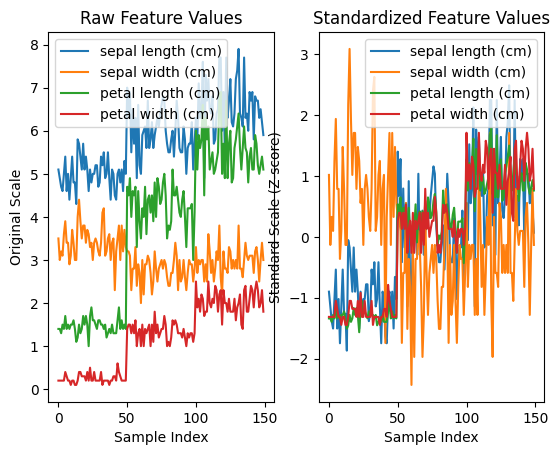

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load data
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Scale the data (standardization: mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot: Raw data vs Scaled data
#plt.figure(figsize=(12, 5))

# Plot 1: Raw data
plt.subplot(1, 2, 1)
for i in range(X.shape[1]):
    plt.plot(X[:, i], label=feature_names[i])
plt.title("Raw Feature Values")
plt.xlabel("Sample Index")
plt.ylabel("Original Scale")
plt.legend()
# Plot 2: Scaled data
plt.subplot(1, 2, 2)
for i in range(X_scaled.shape[1]):
    plt.plot(X_scaled[:, i], label=feature_names[i])
plt.title("Standardized Feature Values")
plt.xlabel("Sample Index")
plt.ylabel("Standard Scale (Z-score)")

plt.legend()

plt.show()

### PCA 

In [31]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the iris dataset
iris = load_iris()
X = iris.data  # This is a matrix with 150 rows and 4 columns (features)
feature_names = iris.feature_names

# Step 2: Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
# We tell PCA to keep enough components to preserve 95% of the variation
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Print results
print("Original number of features:", X.shape[1])
print("Reduced number of features after PCA:", X_pca.shape[1])
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print("Total variance preserved:", sum(pca.explained_variance_ratio_))


Original number of features: 4
Reduced number of features after PCA: 2
Explained variance ratio of each component: [0.72962445 0.22850762]
Total variance preserved: 0.9581320720000164


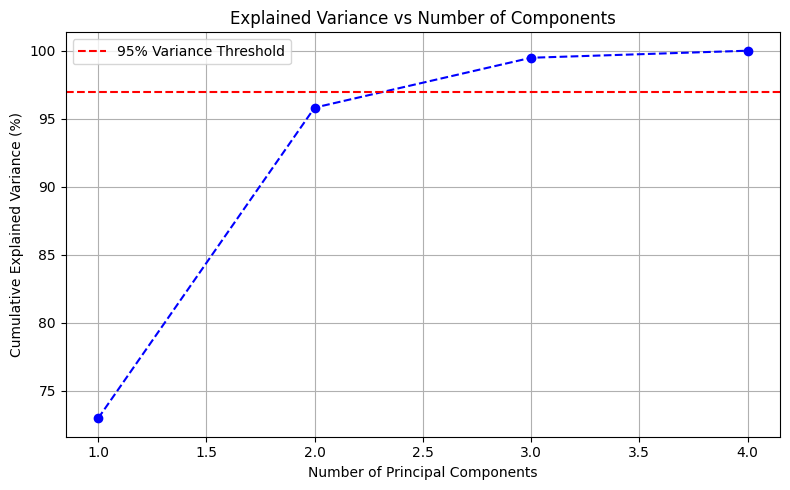

In [39]:
# Step 5: Plot cumulative explained variance
from sklearn.decomposition import PCA
pca_full = PCA().fit(X_scaled) # centered by mean
cumsum = np.cumsum(pca_full.explained_variance_ratio_) * 100
components = np.arange(1, len(cumsum) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, cumsum, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=97, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()
